In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

In [51]:
# TEST_DATE = "1761766150704406200"
TEST_DATE = "1761766658964412400"

In [52]:
# local -> plot

task_to_scenario = []
is_picture = []
tasks = []
data_length = []
for line in open(f"test_result/{TEST_DATE}_test_local_log.txt", "r", encoding="utf-8"):
    if line.startswith("Task"):
        scenario_and_task, work_type, data, start_timestamp, elapsed_time, code, response = line.rstrip().split(" / ")
        scenario_and_task = scenario_and_task.rpartition("Task #")[2]
        scenario_id, _, task_id = scenario_and_task.partition('-')
        task_to_scenario.append(int(scenario_id))
        tasks.append((int(task_id), int(data), work_type == "i", float(start_timestamp), float(elapsed_time.partition(" sec")[0]), code))

scenarios = []
current_group_idx = 1
current_group = []
tasks.sort()
for task_id, dl, work_type, start, elapsed, code in tasks:
    data_length.append(dl)
    is_picture.append(work_type)
    if task_to_scenario[task_id-1] != current_group_idx:
        current_group_idx = task_to_scenario[task_id-1]
        scenarios.append(current_group)
        current_group = []
    current_group.append((task_id, start, elapsed))
scenarios.append(current_group)

scenario_start_time = []

for group in scenarios:
    t = min(map(lambda x: x[1], group))
    scenario_start_time.append(t)
    for i in range(len(group)):
        group[i] = (group[i][0], group[i][1] - t, group[i][2])


In [53]:
def plot_local(scenario_list=None):
    x = []
    x_val = 0
    x_labels = []
    y = []
    dy = []
    colors = []
    
    if scenario_list is None:
        scenario_list = range(1, len(scenarios)+1)
    for s_idx in scenario_list:
        group = scenarios[s_idx - 1]
        for task in group:
            task_id, start_time, elapsed = task
            x.append(x_val)
            x_labels.append(task_id)
            y.append(start_time)
            dy.append(elapsed)
            colors.append("#5555ff" if is_picture[task_id-1] else "#aa55aa")
            x_val += 1
        x_val += 2

    max_y = max(map(sum, zip(y, dy)))

    fig, axes = plt.subplots(1, 1, figsize=(18, 12))
    plt.setp(axes, xticks=x, xticklabels=x_labels, xlabel="Tasks", ylabel="Time (sec, relative)")

    axes.bar(x, dy, bottom=y, color=colors)
    ex_y = max(max_y / 30, 1)
    axes.set_ylim(-ex_y, max_y + ex_y)

    plt.show()

In [54]:

def plot_statistic(scenario_list=None):
    img_task_taken_max = []
    img_task_taken_avg = []
    img_task_taken_min = []
    txt_task_taken_max = []
    txt_task_taken_avg = []
    txt_task_taken_min = []
    
    x_max = []
    x_avg = []
    x_min = []
    x_labels = []

    x_val = 0
    if scenario_list is None:
        scenario_list = range(1, len(scenarios)+1)
    for s_idx in scenario_list:
        group = scenarios[s_idx - 1]
        x_max.append(x_val+0.8)
        x_avg.append(x_val)
        x_min.append(x_val-0.8)
        x_labels.append(f"S#{s_idx}")
        x_val += 3
        
        i_time_min = float('inf')
        i_time_max = float('-inf')
        i_time_sum = 0
        i_time_count = 0
        t_time_min = float('inf')
        t_time_max = float('-inf')
        t_time_sum = 0
        t_time_count = 0
        for task in group:
            task_id, _, elapsed = task
            if is_picture[task_id - 1]:
                i_time_count += 1
                i_time_sum += elapsed
                i_time_min = min(i_time_min, elapsed)
                i_time_max = max(i_time_max, elapsed)
            else:
                t_time_count += 1
                t_time_sum += elapsed
                t_time_min = min(t_time_min, elapsed)
                t_time_max = max(t_time_max, elapsed)
        if i_time_count == 0:
            img_task_taken_max.append(0)
            img_task_taken_avg.append(0)
            img_task_taken_min.append(0)
        else:
            img_task_taken_max.append(i_time_max)
            img_task_taken_avg.append(i_time_sum / i_time_count)
            img_task_taken_min.append(i_time_min)
        if t_time_count == 0:
            txt_task_taken_max.append(0)
            txt_task_taken_avg.append(0)
            txt_task_taken_min.append(0)
        else:
            txt_task_taken_max.append(t_time_max)
            txt_task_taken_avg.append(t_time_sum / t_time_count)
            txt_task_taken_min.append(t_time_min)
    
    fig, axes = plt.subplots(2, 1, figsize=(12, 18))
    plt.setp(axes, xticks=x_avg, xticklabels=x_labels, xlabel="Scenarios", ylabel="Taken time (sec)")
    
    axes[0].set_title('"Upload" Stat')
    axes[0].bar_label(axes[0].bar(x_max, img_task_taken_max, color='#3333ff', label="MAX"), fmt="%.2f")
    axes[0].bar_label(axes[0].bar(x_avg, img_task_taken_avg, color='#33aa33', label="AVG"), fmt="%.2f")
    axes[0].bar_label(axes[0].bar(x_min, img_task_taken_min, color='#ff5555', label="MIN"), fmt="%.2f")
    
    axes[1].set_title('"Search" Stat')
    axes[1].bar_label(axes[1].bar(x_max, txt_task_taken_max, color='#3333ff', label="MAX"), fmt="%.2f")
    axes[1].bar_label(axes[1].bar(x_avg, txt_task_taken_avg, color='#33aa33', label="AVG"), fmt="%.2f")
    axes[1].bar_label(axes[1].bar(x_min, txt_task_taken_min, color='#ff5555', label="MIN"), fmt="%.2f")
    
    fig.legend(("MIN", "AVG", "MAX"), loc="lower right", bbox_to_anchor=(1, 1))
    fig.tight_layout()
    plt.plot()

In [55]:
target_scenario_num = None

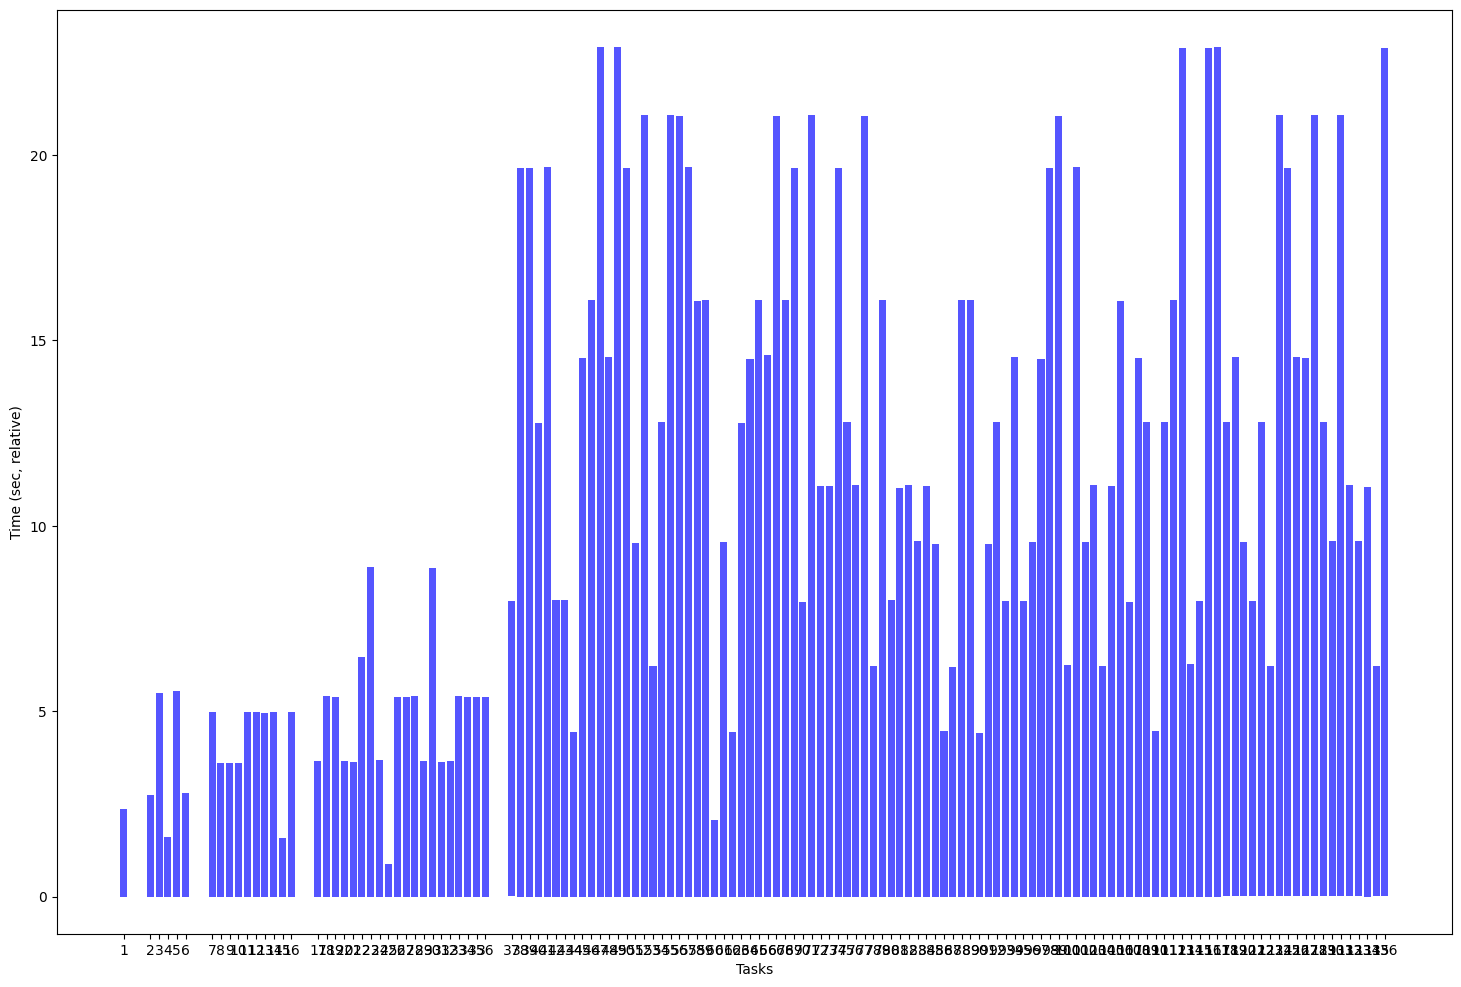

In [56]:
plot_local(range(1, 6))

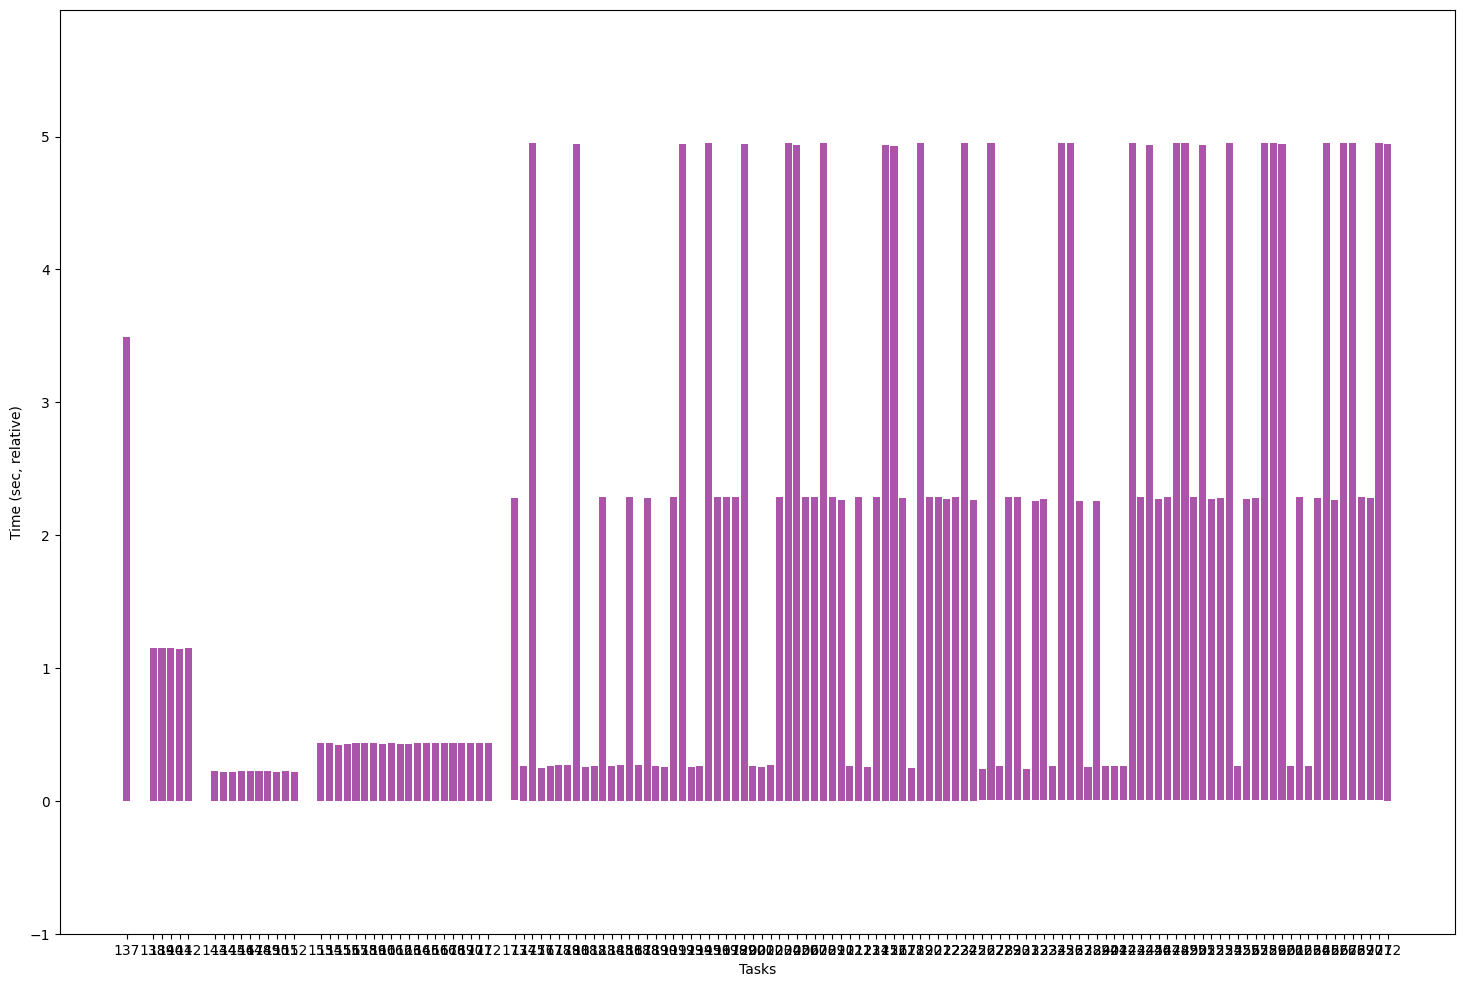

In [57]:
plot_local(range(6, 11))

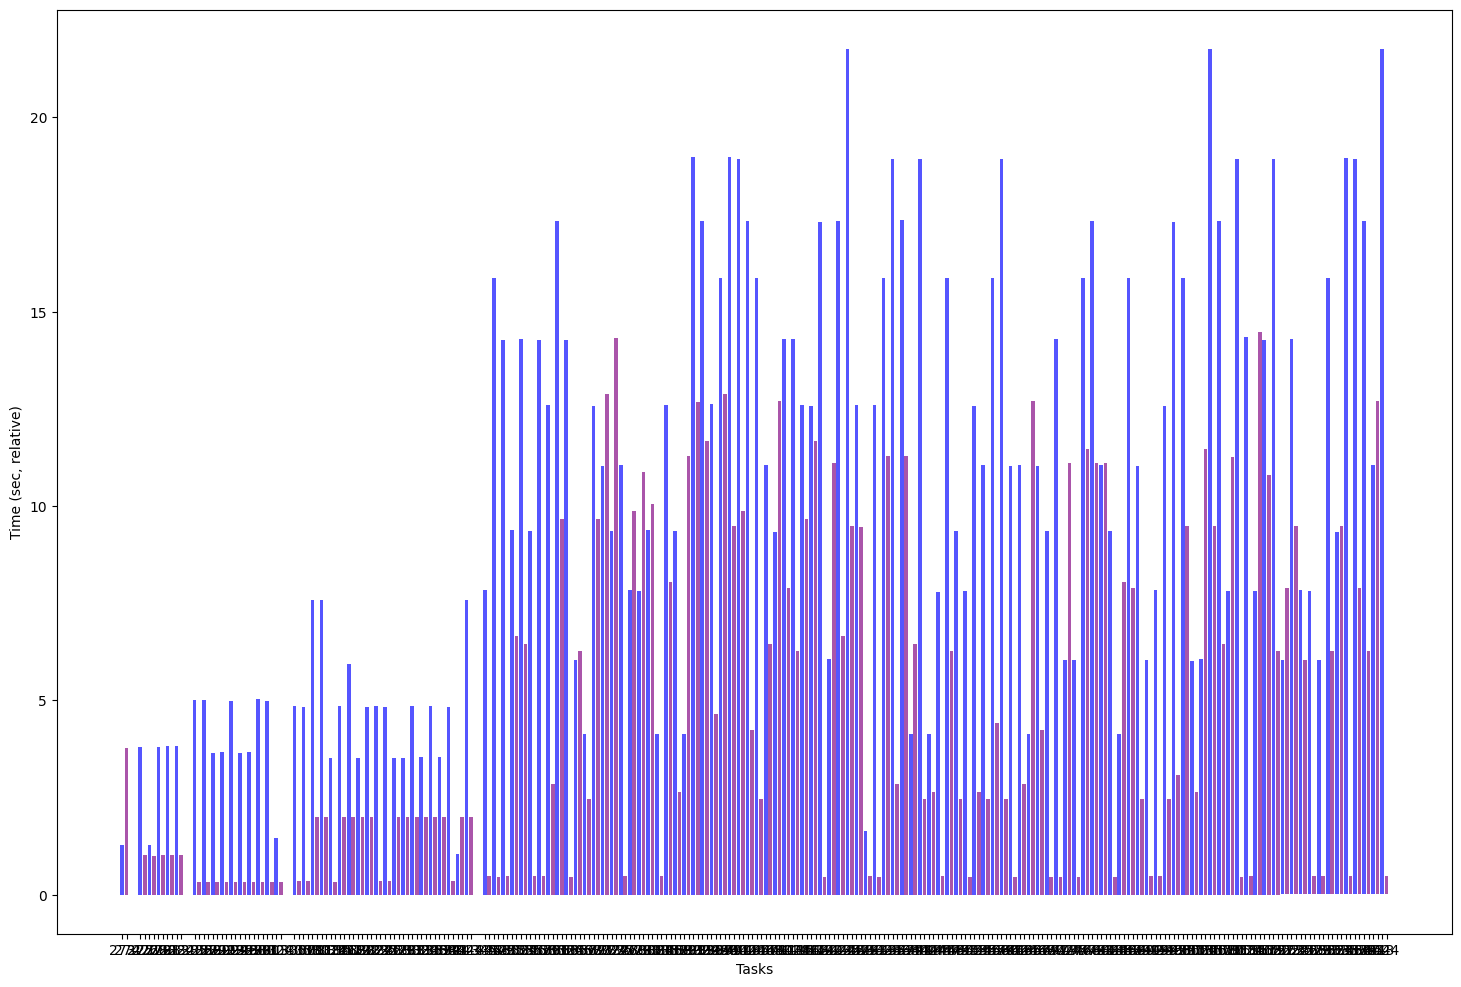

In [58]:
plot_local(range(11, 16))

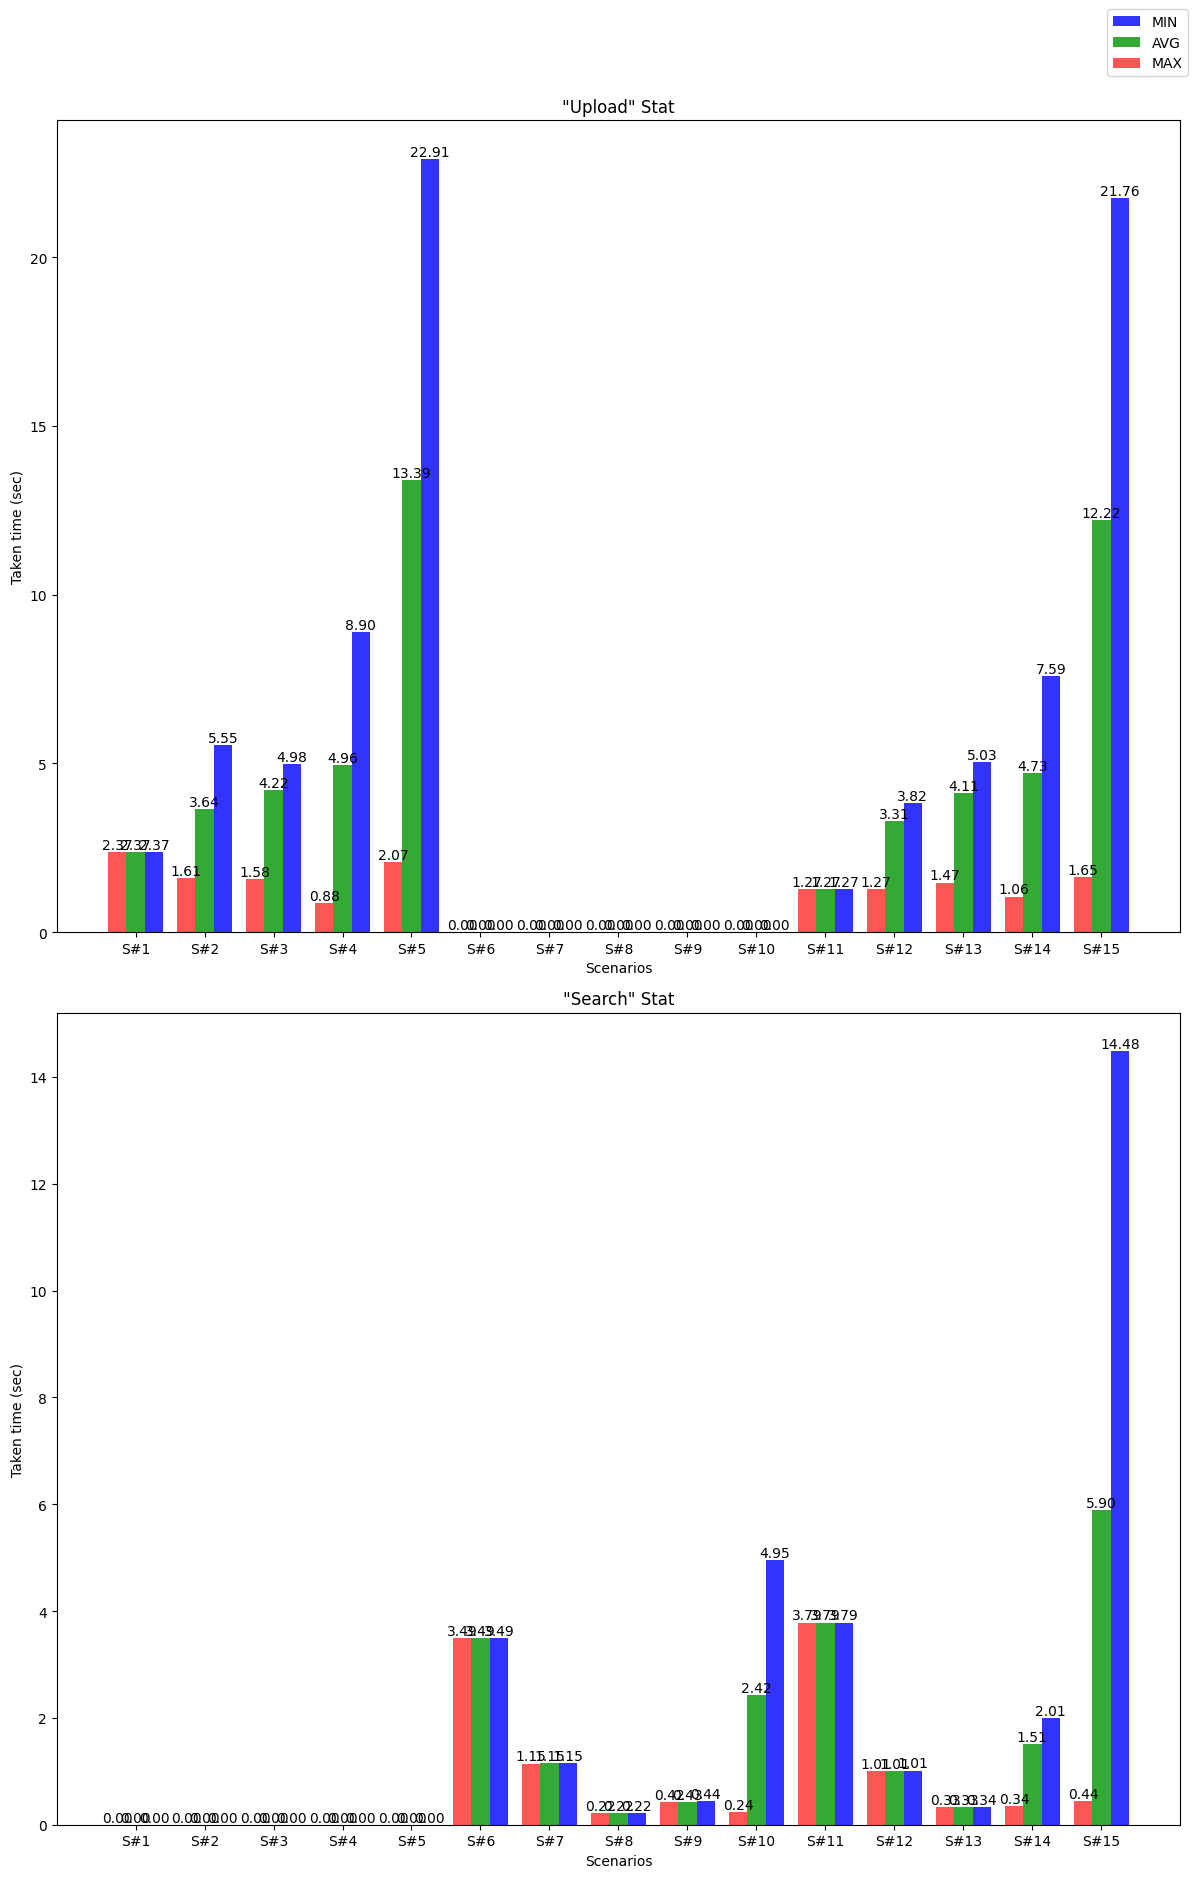

In [59]:
plot_statistic()

In [149]:
# https://stackoverflow.com/questions/9103166/multiple-axis-in-matplotlib-with-different-scales
def plot_smem(target_scenarios=None):
    # TIMESTAMP      PID SWAP USS PSS
    x = []
    l_swap = []
    l_uss = []
    l_pss = []
    for line in open(f"test_result/{TEST_DATE}_test_smem_log.txt", "r", encoding="utf-8"):
        if not line.endswith(('\r', '\n')): break
        timestamp, _, swap, uss, pss = line.strip().split()
        x.append(int(timestamp))
        l_swap.append(int(swap)/1000)
        l_uss.append(int(uss)/1000)
        l_pss.append(int(pss)/1000)

    x_start = x[0]
    for i in range(len(x)):
        x[i] -= x_start
        
    if target_scenarios is None:
        target_scenarios = range(1, len(scenarios)+1)
    
    scenario_running_interval = []
    for i in target_scenarios:
        start_t = scenario_start_time[i-1] - x_start
        end_t = start_t + max(map(lambda l: l[1] + l[2], scenarios[i-1]))
        scenario_running_interval.append((start_t, end_t))
        
    fig, ax = plt.subplots(figsize=(20, 8))

    handles = []
    handles += ax.plot(x, l_swap, 'm-', label="SWAP")
    handles += ax.plot(x, l_pss, '-', label="PSS", c="#00ff0080")
    handles += ax.plot(x, l_uss, '-', label="USS", c="#0000ff80")


    fig.legend(handles=handles, ncols=max(int(len(handles)**.5), 1), loc="lower right", bbox_to_anchor=(1, 1))

    ax.set_xlabel("Time (sec, relative)")
    ax.set_ylabel("Memory (MB)")


    for st, et in scenario_running_interval:
        ax.axvspan(st, et, alpha=0.2, color='red')

    sx = min(v[0] for v in scenario_running_interval)
    ex = max(v[1] for v in scenario_running_interval)
    dx = max((ex - sx) / 40, 3)
    ax.set_xlim(sx - dx, ex + dx)
    
    fig.tight_layout()

    plt.show()

In [150]:
from datetime import datetime, timezone

def plot_vmstat(target_scenarios=None):
    x = []
    l_proc_run = []
    l_proc_block = []
    l_mem_swpd = []
    l_mem_free = []
    l_mem_buff = []
    l_mem_cache = []
    l_swp_in = []
    l_swp_out = []
    l_io_in = []
    l_io_out = []
    l_sys_intr = []
    l_sys_cs = []
    l_cpu_user = []
    l_cpu_sys = []
    l_cpu_idle = []
    l_cpu_wa = []
    l_cpu_st = []
    l_cpu_gu = []

    for line in open(f"test_result/{TEST_DATE}_test_vmstat_log.txt", "r", encoding="utf-8"):
        line = line.strip()
        if line.startswith(("procs", "r")):
            continue
        proc_run, proc_block, \
            mem_swpd, mem_free, mem_buff, mem_cache, \
            swp_in, swp_out, io_in, io_out, sys_intr, sys_cs, \
            cpu_user, cpu_sys, cpu_idle, cpu_wa, cpu_st, cpu_gu, *timestamp = line.split()
        l_proc_run.append(int(proc_run))
        l_proc_block.append(int(proc_block))
        l_mem_swpd.append(int(mem_swpd)/1000)
        l_mem_free.append(int(mem_free)/1000)
        l_mem_buff.append(int(mem_buff)/1000)
        l_mem_cache.append(int(mem_cache)/1000)
        l_swp_in.append(int(swp_in)/1000)
        l_swp_out.append(int(swp_out)/1000)
        l_io_in.append(int(io_in)/1000)
        l_io_out.append(int(io_out)/1000)
        l_sys_intr.append(int(sys_intr))
        l_sys_cs.append(int(sys_cs))
        l_cpu_user.append(int(cpu_user))
        l_cpu_sys.append(int(cpu_sys))
        l_cpu_idle.append(int(cpu_idle))
        l_cpu_wa.append(int(cpu_wa))
        l_cpu_st.append(int(cpu_st))
        l_cpu_gu.append(int(cpu_gu))
        x.append(datetime.strptime(' '.join(timestamp), "%Y-%m-%d %H:%M:%S").replace(tzinfo=timezone.utc).timestamp())

    x_start = x[0]
    for i in range(len(x)):
        x[i] -= x_start
        
    if target_scenarios is None:
        target_scenarios = range(1, len(scenarios)+1)
    
    scenario_running_interval = []
    for i in target_scenarios:
        start_t = scenario_start_time[i-1] - x_start
        end_t = start_t + max(map(lambda l: l[1] + l[2], scenarios[i-1]))
        scenario_running_interval.append((start_t, end_t))
    
    fig, axes = plt.subplots(3, 1, figsize=(20, 18))
    ax_swap = axes[0]
    ax_block = axes[1]
    ax_cpu = axes[2]

    handles = []
    handles += ax_swap.plot(x, l_swp_in, '-', label="Swap-in blocks", c="#00aa95")
    handles += ax_swap.plot(x, l_swp_out, '-', label="Swap-out blocks", c="#723700")
    handles += ax_block.plot(x, l_io_in, '-', label="Received blocks (In)", c="#001172")
    handles += ax_block.plot(x, l_io_out, '-', label="Sent blocks (Out)", c="#404C00")
    handles += ax_cpu.plot(x, l_cpu_user, '-', label="User%", c="#994455")
    handles += ax_cpu.plot(x, l_cpu_sys, '-', label="Sys%", c="#228c97")
    handles += ax_cpu.plot(x, l_cpu_wa, '-', label="Wait%", c="#4444ff")

    fig.legend(handles=handles, ncol=max(int(len(handles)**.5), 1), loc="lower right", bbox_to_anchor=(1, 1))

    sx = min(v[0] for v in scenario_running_interval)
    ex = max(v[1] for v in scenario_running_interval)
    dx = max((ex - sx) / 40, 3)
    for ax in axes:
        ax.set_xlim(sx - dx, ex + dx)

    ax_swap.set_xlabel("Time (sec)")
    ax_swap.set_ylabel("Memory/IO (1000KB)")
    ax_swap.ticklabel_format(style="plain")
    ax_block.set_xlabel("Time (sec)")
    ax_block.set_ylabel("Memory/IO (1000KB)")
    ax_block.ticklabel_format(style="plain")
    ax_cpu.set_xlabel("Time (sec)")
    ax_cpu.set_ylabel("Usage (%)")
    ax_cpu.ticklabel_format(style="plain")

    for ax in axes:
        for st, et in scenario_running_interval:
            ax.axvspan(st, et, alpha=0.2, color='red')
            
    fig.tight_layout()

    plt.show()

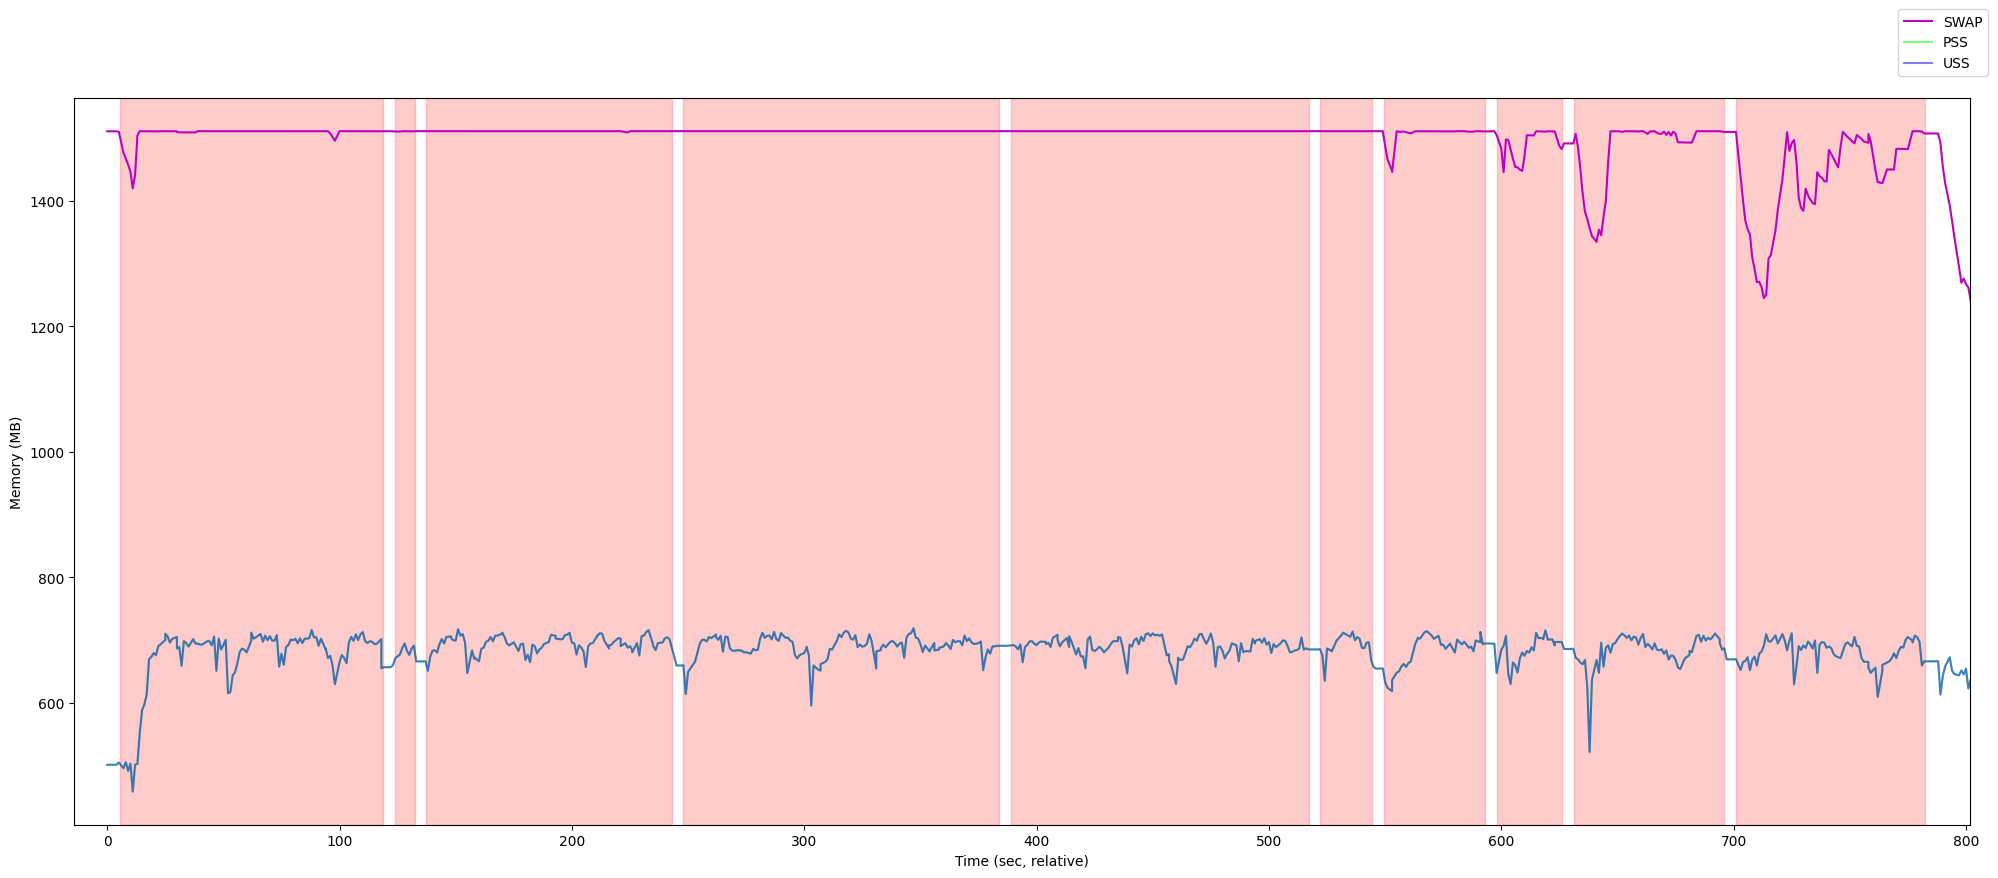

In [151]:
plot_smem(target_scenario_num)

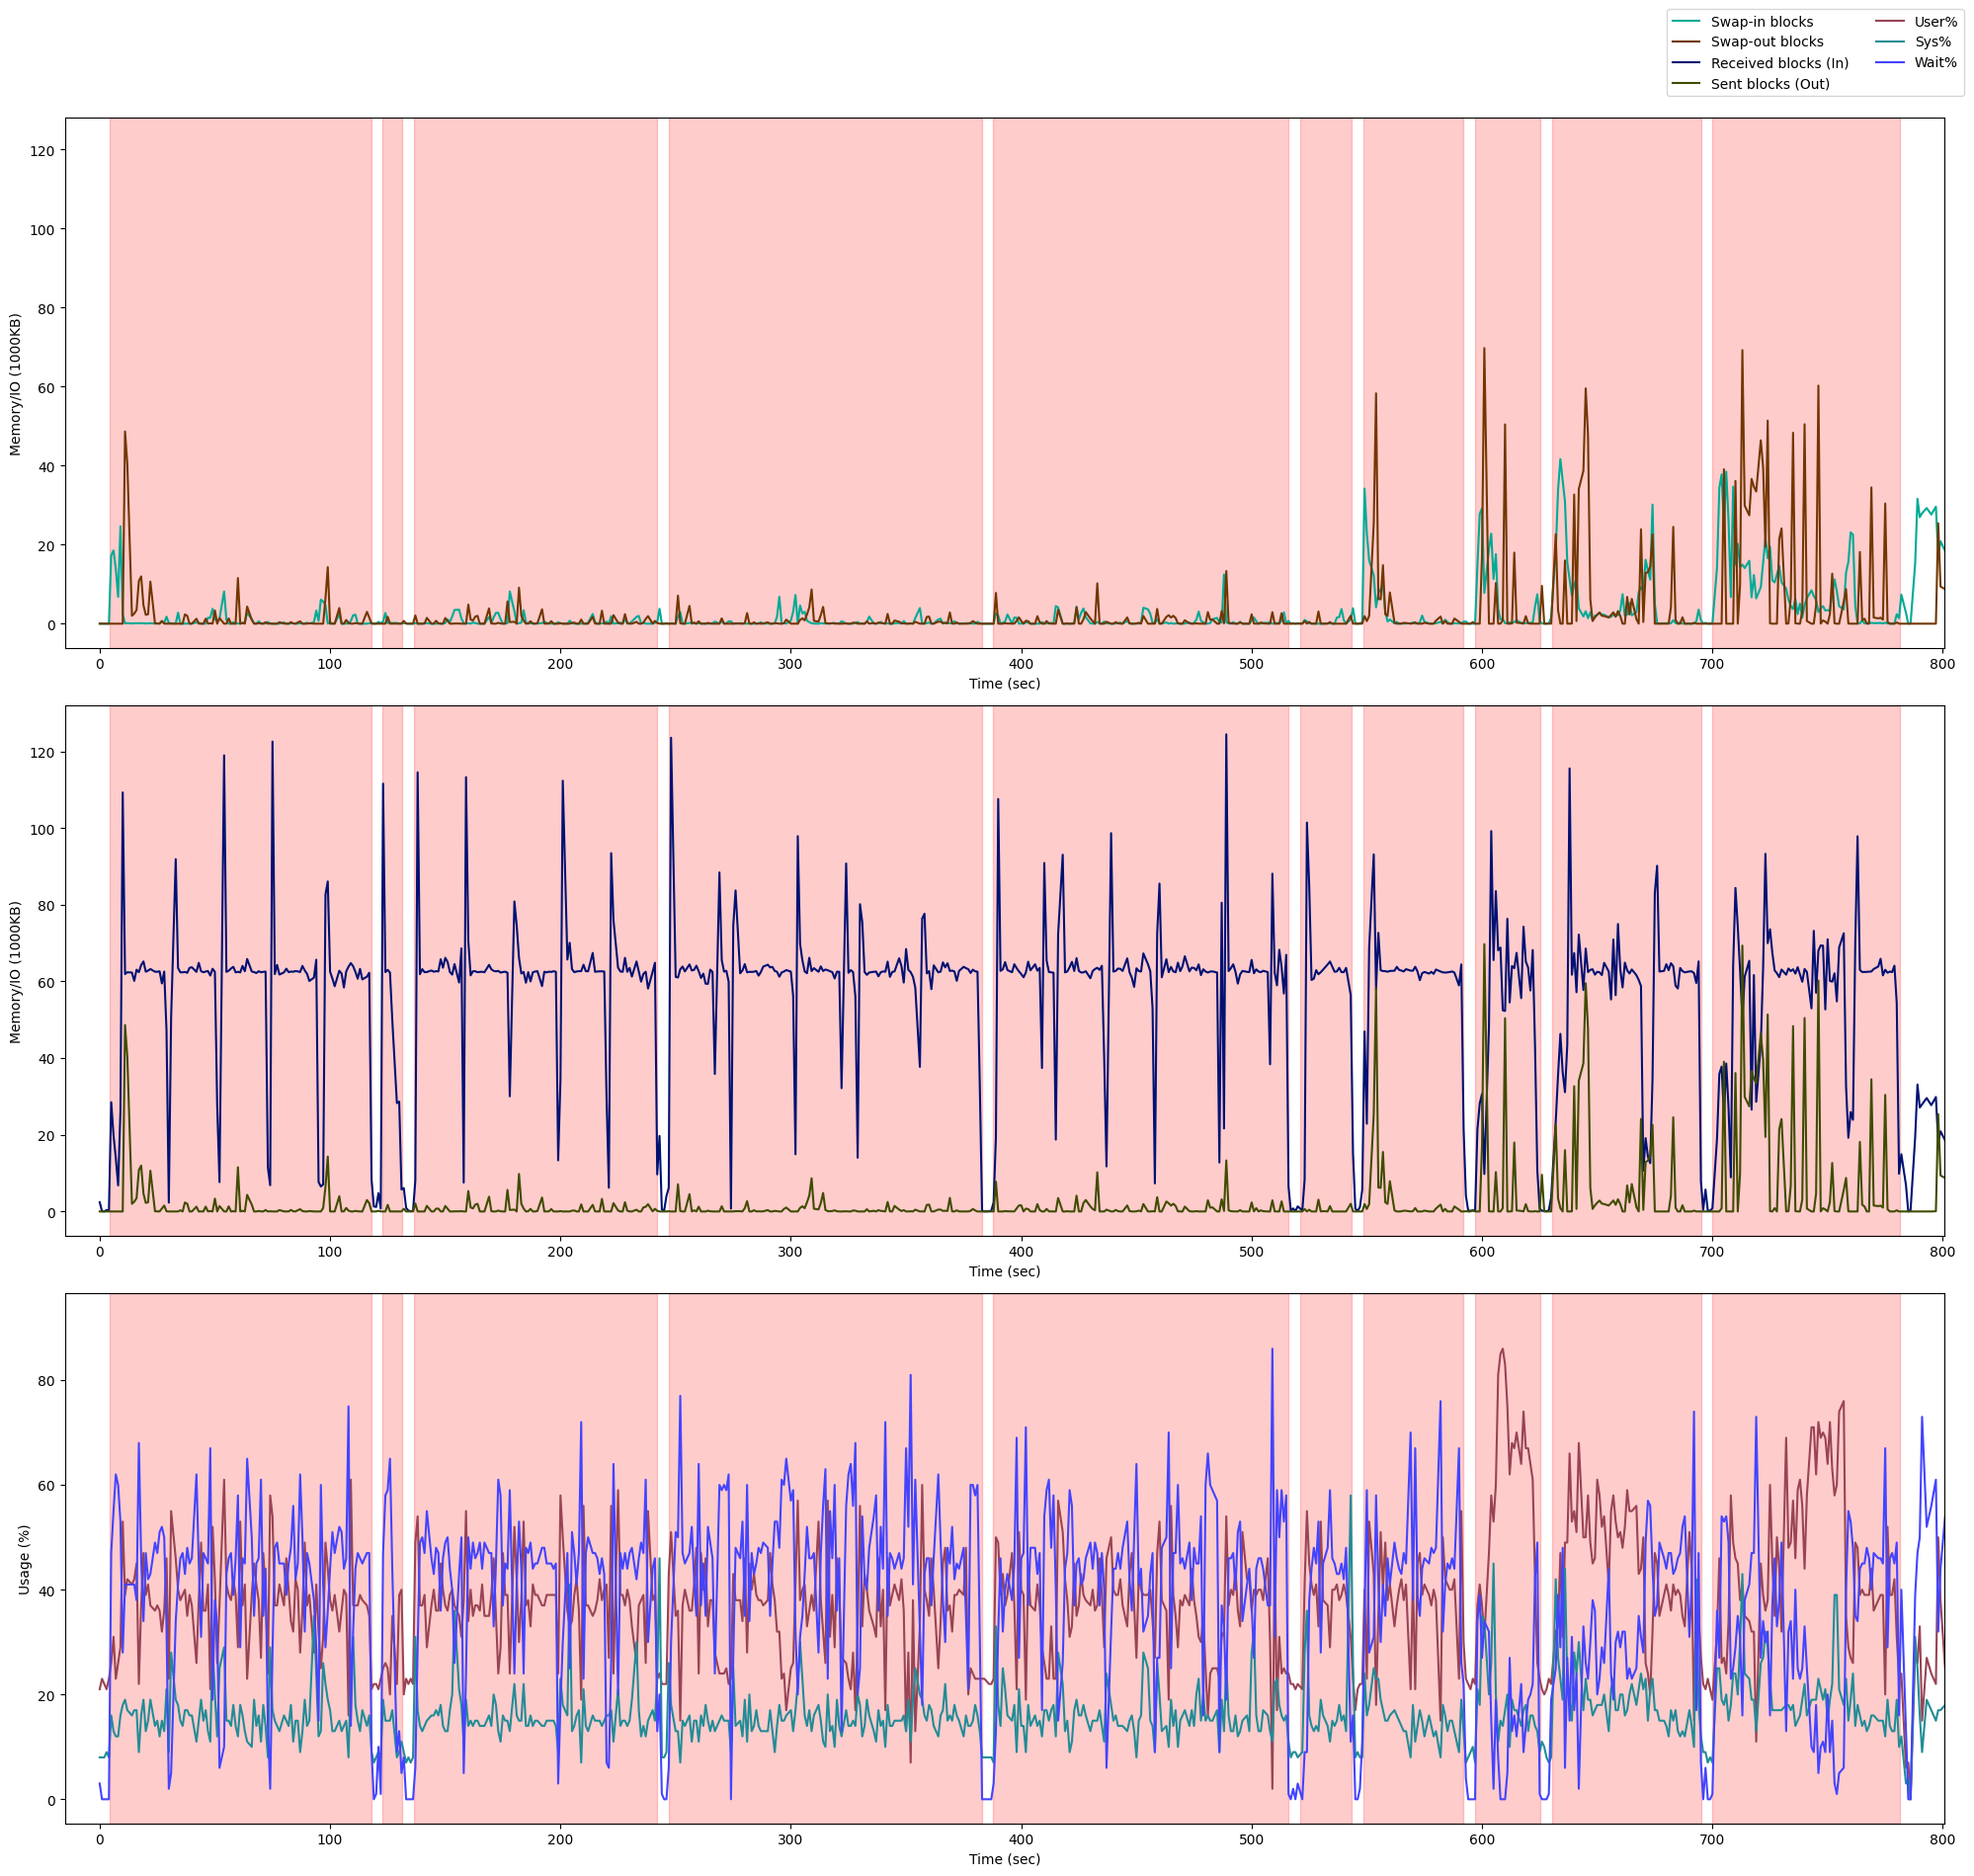

In [152]:
plot_vmstat(target_scenario_num)